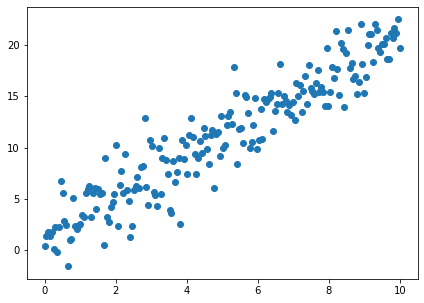

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Generate a list of x and shuffle it so that its not in order
x = np.linspace(0, 10, 200)
np.random.shuffle(x)
#  Generate another list of y with linear relationship to x
y = 2 * x + 1
# add noise to y by generating a random sample from y
# with mean 0 and std. deviation 2
y_noise = y + np.random.normal(0, 2, len(x))
# Create a dataframe with x and y_noise as columns
df = pd.DataFrame({'x': x, 'y': y_noise})
# Plot the scatter plot of x and y
plt.figure(figsize=(7,5))
plt.scatter(df['x'], df['y'])
plt.show()

In [21]:
df.head()

,x,y
0,2.763819,6.627646
1,6.984925,15.449577
2,3.668342,8.159172
3,7.035176,15.358872
4,3.115578,8.538492


In [28]:
# making a function for loss function also known as mean squared error
def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].x
        y = points.iloc[i].y
        total_error += (y - (m * x + b)) ** 2
    total_error/float(len(points))
    
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i].x
        y = points.iloc[i].y
        
        m_gradient += -(2/n) * x * (y- (m_now * x + b_now))
        b_gradient += -(2/n) * (y- (m_now * x + b_now))
    
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
Epoch: 300
Epoch: 350
Epoch: 400
Epoch: 450
2.0648361551401844 0.44453521163167986


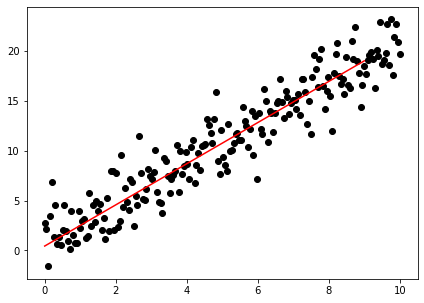

In [31]:
m = 0
b = 0
L = 0.001
epoch = 500

for i in range(epoch):
    if i % 50 == 0:
        print(f"Epoch: {i}")
    m, b = gradient_descent(m, b, df, L)
    
print(m,b)
plt.figure(figsize=(7,5))
plt.scatter(df.x, df.y, color="black")
plt.plot(list(range(0,10)), [m * x + b for x in range(0,10)], color="red")
plt.show()